Macarena Benjamin

# Set de datos: *Credit Risk*

**loan_id:** loan number

**id:** client number

**code_gender:** gender

**flag_own_car:** if users have a car

**flag_own_realty:** is there a property

**cnt_children:** number of children

**amt_income_total:** annual income

**name_income_type:** income category

**name_education_type:** education level

**name_family_status:** marital status

**name_housing_type:** way of living

**days_birth:** is the age in days of the client at the time of the loan in negative days

**days_employed:** days employed relative to the client's age

**flag_mobil:** is there a mobile phone

**flag_work_phone:** is there a work phone

**flag_phone:** is there a phone

**flag_email:** is there an email

**occupation_type:** occupation

**cnt_fam_members:** family size

**status:** 0->paid on time 1->Not paid on time

**birthday:** birthday

**job_start_date:** job start date

**loan_date:** loan date

**loan_amount:** loan amount

#Importacion del dataset: credit_risk.csv

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from datetime import datetime, date

In [ ]:
df = pd.read_csv('/content/drive/My Drive/credit_risk.csv')

In [ ]:
df.head()

,loan_id,id,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,name_income_type,name_education_type,name_family_status,...,flag_work_phone,flag_phone,flag_email,occupation_type,cnt_fam_members,status,birthday,job_start_date,loan_date,loan_amount
0,208089,5044500,F,N,Y,0.0,45000.0,Pensioner,Secondary / secondary special,Widow,...,0,0,0,NaN,1.0,0,1955-08-04,3021-09-18,2019-01-01,133.714974
1,112797,5026631,F,N,Y,0.0,99000.0,Working,Secondary / secondary special,Separated,...,0,0,0,Medicine staff,1.0,0,1972-03-30,1997-06-05,2019-01-01,158.800558
2,162434,5036645,M,Y,N,NaN,202500.0,Working,Incomplete higher,Married,...,0,0,0,Drivers,2.0,0,1987-03-24,2015-02-22,2019-01-01,203.608487
3,144343,5033584,NaN,N,NaN,NaN,292500.0,Working,Higher education,Married,...,0,0,0,NaN,2.0,0,1973-03-15,2009-06-29,2019-01-01,113.204964
4,409695,5085755,F,Y,Y,1.0,112500.0,Commercial associate,Secondary / secondary special,Civil marriage,...,0,0,0,Core staff,3.0,0,1989-10-15,2019-07-03,2019-01-01,109.376260


#Creacion de variables

In [ ]:
#Se modifica la columna "loan_date" en formato fecha

df = df.sort_values(by=["id", "loan_date"])
df = df.reset_index(drop=True)
df["loan_date"] = pd.to_datetime(df.loan_date)

In [ ]:
#Se modifica "birthday" y  se crea "age"

df['birthday'] = pd.to_datetime(df['birthday'], errors='coerce')
df['age'] = (pd.to_datetime('today').normalize() - df['birthday']).dt.days // 365

In [ ]:
#Se modifica "job_start_date" y se crea "years_on_the_job"

df['job_start_date'] = pd.to_datetime(df['job_start_date'], errors='coerce')
df['years_on_the_job'] = (pd.to_datetime('today').normalize() - df['job_start_date']).dt.days // 365

In [ ]:
#Se crea variable "avg_amount_loans_previous"

avg_amounts = []
for user in df.id.unique():
    df_user = df.loc[df.id == user, :]
    avg_amounts.extend(
        df_user["loan_amount"].rolling(df_user.shape[0], min_periods=1)
        .mean()
        .shift(periods=1)
        .tolist()
    )
df["avg_amount_loans_previous"] = avg_amounts

In [ ]:
df.head()

,loan_id,id,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,name_income_type,name_education_type,name_family_status,...,occupation_type,cnt_fam_members,status,birthday,job_start_date,loan_date,loan_amount,age,years_on_the_job,avg_amount_loans_previous
0,1008,5008804,M,Y,Y,0.0,427500.0,Working,Higher education,Civil marriage,...,NaN,2.0,0,1988-11-04,2009-04-11,2019-02-01,102.283361,35,15.0,NaN
1,1000,5008804,M,Y,Y,NaN,427500.0,Working,Higher education,Civil marriage,...,NaN,2.0,0,1988-11-04,2009-04-11,2019-02-15,136.602049,35,15.0,102.283361
2,1012,5008804,M,Y,NaN,0.0,427500.0,Working,Higher education,Civil marriage,...,NaN,2.0,0,1988-11-04,2009-04-11,2019-02-17,114.733694,35,15.0,119.442705
3,1011,5008804,M,Y,Y,0.0,427500.0,Working,Higher education,Civil marriage,...,NaN,2.0,0,1988-11-04,2009-04-11,2019-05-20,103.539050,35,15.0,117.873035
4,1003,5008804,M,Y,Y,0.0,427500.0,Working,Higher education,Civil marriage,...,NaN,2.0,0,1988-11-04,2009-04-11,2019-07-05,112.948147,35,15.0,114.289538


#Muestra: Reduccion del set de datos

In [ ]:
import random
import math

In [ ]:
#Se genera una copia del df

df_copy = df.copy(deep = True)

In [ ]:
#Se obtienen los id unicos

total_id = df_copy.id.unique()

In [ ]:
#Se selecciona aleatoriamente un 20% de los id unicos

min_id = random.choices(total_id,k=math.floor(len(total_id)*0.2))

In [ ]:
#Se guarda una  copia filtrada de df_copy, conteniendo solo las filas cuyos id estan en la lista min_id

df_min = df_copy.copy(deep = True).loc[df.id.isin(min_id),:].reset_index(drop=True)

In [ ]:
#Informacion del data set reducido

df_min.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142501 entries, 0 to 142500
Data columns (total 27 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   loan_id                    142501 non-null  int64         
 1   id                         142501 non-null  int64         
 2   code_gender                135534 non-null  object        
 3   flag_own_car               142501 non-null  object        
 4   flag_own_realty            129003 non-null  object        
 5   cnt_children               122637 non-null  float64       
 6   amt_income_total           142501 non-null  float64       
 7   name_income_type           142501 non-null  object        
 8   name_education_type        142501 non-null  object        
 9   name_family_status         142501 non-null  object        
 10  name_housing_type          142501 non-null  object        
 11  days_birth                 142501 non-null  int64   

In [ ]:
df_min.head()

,loan_id,id,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,name_income_type,name_education_type,name_family_status,...,occupation_type,cnt_fam_members,status,birthday,job_start_date,loan_date,loan_amount,age,years_on_the_job,avg_amount_loans_previous
0,1016,5008805,NaN,Y,Y,0.0,427500.0,Working,Higher education,Civil marriage,...,NaN,2.0,0,1988-11-04,2009-04-11,2019-04-30,114.677834,35,15.0,NaN
1,1022,5008805,M,Y,Y,NaN,427500.0,Working,Higher education,Civil marriage,...,NaN,2.0,0,1988-11-04,2009-04-11,2019-05-24,108.400483,35,15.0,114.677834
2,1025,5008805,M,Y,Y,0.0,427500.0,Working,Higher education,Civil marriage,...,NaN,2.0,0,1988-11-04,2009-04-11,2019-06-19,106.006721,35,15.0,111.539159
3,1023,5008805,M,Y,Y,0.0,427500.0,Working,Higher education,Civil marriage,...,NaN,2.0,0,1988-11-04,2009-04-11,2019-07-15,101.689045,35,15.0,109.695013
4,1021,5008805,NaN,Y,Y,0.0,427500.0,Working,Higher education,Civil marriage,...,NaN,2.0,0,1988-11-04,2009-04-11,2019-08-12,153.981267,35,15.0,107.693521


In [ ]:
#Se guarda como csv

df_min.to_csv('/content/drive/My Drive/df_min.csv')

In [ ]:
#Se trabaja con este data set reducido

df_min = pd.read_csv('/content/drive/My Drive/df_min.csv')

# Subconjuntos de datos en X e y

In [ ]:
#Se separan las columnas segun tipo de datos

numerical_cols = ['cnt_children','amt_income_total','days_birth','days_employed','cnt_fam_members','loan_amount','age','years_on_the_job','avg_amount_loans_previous']
categorical_cols = ['code_gender','flag_own_car','flag_own_realty','name_income_type','name_education_type','name_family_status','name_housing_type','flag_mobil','flag_work_phone','flag_phone','flag_email','occupation_type']
date_cols = ['job_start_date','loan_date']

In [ ]:
#Se importan librerias de sklearn

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import sklearn

In [ ]:
#Se importan librerias de SMOTE para ajustar de desbalanceo de "status"
from imblearn.over_sampling import SMOTE
from imblearn import pipeline

In [ ]:
from imblearn.pipeline import Pipeline

In [ ]:
#Se separa el set de datos en "X" como el conjunto de variables e "y" la variable target
X = df_min.drop(columns=['status'])
y = df_min.status

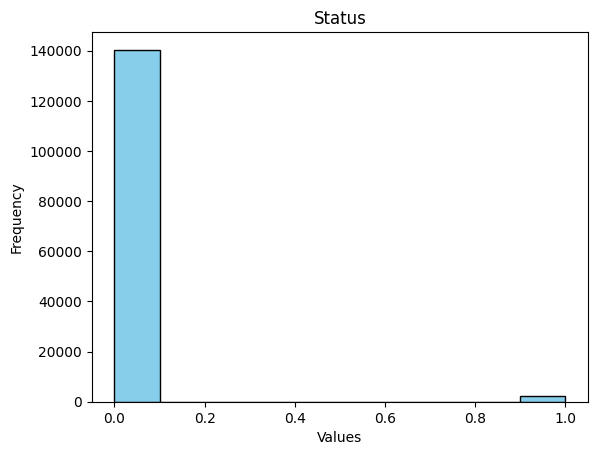

In [ ]:
#Se grafican las clases desbalanceadas
import matplotlib.pyplot as plt
import numpy as np

plt.hist(df_min.status, color='skyblue', edgecolor='black')


plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Status')


plt.show()

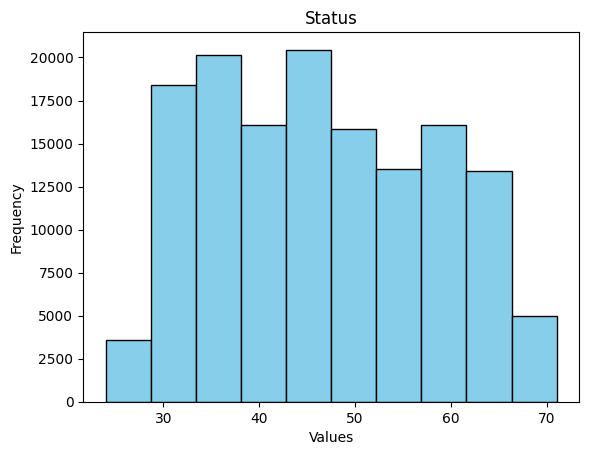

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.hist(df_min.age, color='skyblue', edgecolor='black')


plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Status')


plt.show()

# Construccion del Pipeline

In [ ]:
#Se realizan las inputaciones y transformaciones a las variables segun los tipos de datos
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ("scaler", StandardScaler())
])

In [ ]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
])

## Modelo

In [ ]:
#Se separa el set de datos X e y en subconjuntos de testeo y entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024)


In [ ]:
#Se crea el modelo usando random forest con 100 estimadores y gini

model = RandomForestClassifier(n_estimators=100, criterion='gini')

In [ ]:
#Se crea el pipeline usando imblearn realizando tranformaciones, ajustando desbalanceo de clases con SMOTE y finalmente entrena un modelo de aprendizaje automático

pipeline2 = pipeline.Pipeline(steps=[('preprocessor', preprocessor),
                           ('smote', SMOTE(sampling_strategy=0.1)),
                           ('model', model)
])

In [ ]:
#Se entrena el pipeline

pipeline2.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['cnt_children',
                                                   'amt_income_total',
                                                   'days_birth',
                                                   'days_employed',
                                                   'cnt_fam_members',
                                                   'loan_amount', 'age',
                                                   'years_on_the_job',
                                                   'avg_amount_loans_previous']),
                                                 ('cat',
                                                  Pipeline(steps=[('imput...
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['code_gender',
                                                   'flag_own_car',
                                                   'flag_own_realty',
                                                   'name_income_type',
                                                   'name_education_type',
                                                   'name_family_status',
                                                   'name_housing_type',
                                                   'flag_mobil',
                                                   'flag_work_phone',
                                                   'flag_phone', 'flag_email',
                                                   'occupation_type'])])),
                ('smote', SMOTE(sampling_strategy=0.1)),
                ('model', RandomForestClassifier())])

In [ ]:
#Invoco a las transformaciones que se aplicaron en el pipeline

pipeline2[0]

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('scaler', StandardScaler())]),
                                 ['cnt_children', 'amt_income_total',
                                  'days_birth', 'days_employed',
                                  'cnt_fam_members', 'loan_amount', 'age',
                                  'years_on_the_job',
                                  'avg_amount_loans_previous']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['code_gender', 'flag_own_car',
                                  'flag_own_realty', 'name_income_type',
                                  'name_education_type', 'name_family_status',
                                  'name_housing_type', 'flag_mobil',
                                  'flag_work_phone', 'flag_phone', 'flag_email',
                                  'occupation_type'])])

In [ ]:
#Se crea un dataframe que contiene los datos de X_train despues de haber sido preprocesados por el primer paso del pipeline pipeline2 (el preprocesador).
#Las columnas del DataFrame resultante tienen nombres correspondientes a las características generadas o transformadas por ese preprocesador.

dfpipe2 = pd.DataFrame(pipeline2[0].transform(X_train),columns=pipeline2[0].get_feature_names_out())

In [ ]:
#Se muestra informacion del dataframe

dfpipe2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 61 columns):
 #   Column                                                  Non-Null Count   Dtype  
---  ------                                                  --------------   -----  
 0   num__cnt_children                                       114000 non-null  float64
 1   num__amt_income_total                                   114000 non-null  float64
 2   num__days_birth                                         114000 non-null  float64
 3   num__days_employed                                      114000 non-null  float64
 4   num__cnt_fam_members                                    114000 non-null  float64
 5   num__loan_amount                                        114000 non-null  float64
 6   num__age                                                114000 non-null  float64
 7   num__years_on_the_job                                   114000 non-null  float64
 8   num__avg_amount_loans_pr

In [ ]:
#Invoco al ajuste de desbalanceo que se aplicó en el pipeline con el objetivo de crear suficientes ejemplos sintéticos de la clase minoritaria para que constituyan el 10% del tamaño de la clase mayoritaria.

pipeline2[1]

SMOTE(sampling_strategy=0.1)

In [ ]:
#Aplica SMOTE al conjunto de datos dfpipe2 y a las etiquetas y_train, creando un nuevo conjunto de datos almacenado en alldf con clases más equilibradas

alldf = pipeline2[1].fit_resample(dfpipe2,y_train)

In [ ]:
#Se convierte el conjunto de datos de características resampleadas, en un DataFrame de pandas.

alldf = pd.DataFrame(alldf[0])

In [ ]:
#Se obtiene info

alldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123549 entries, 0 to 123548
Data columns (total 61 columns):
 #   Column                                                  Non-Null Count   Dtype  
---  ------                                                  --------------   -----  
 0   num__cnt_children                                       123549 non-null  float64
 1   num__amt_income_total                                   123549 non-null  float64
 2   num__days_birth                                         123549 non-null  float64
 3   num__days_employed                                      123549 non-null  float64
 4   num__cnt_fam_members                                    123549 non-null  float64
 5   num__loan_amount                                        123549 non-null  float64
 6   num__age                                                123549 non-null  float64
 7   num__years_on_the_job                                   123549 non-null  float64
 8   num__avg_amount_loans_pr

In [ ]:
#Se visualizan las columnas

alldf.columns

Index(['num__cnt_children', 'num__amt_income_total', 'num__days_birth',
       'num__days_employed', 'num__cnt_fam_members', 'num__loan_amount',
       'num__age', 'num__years_on_the_job', 'num__avg_amount_loans_previous',
       'cat__code_gender_F', 'cat__code_gender_M', 'cat__flag_own_car_N',
       'cat__flag_own_car_Y', 'cat__flag_own_realty_N',
       'cat__flag_own_realty_Y', 'cat__name_income_type_Commercial associate',
       'cat__name_income_type_Pensioner',
       'cat__name_income_type_State servant', 'cat__name_income_type_Student',
       'cat__name_income_type_Working',
       'cat__name_education_type_Academic degree',
       'cat__name_education_type_Higher education',
       'cat__name_education_type_Incomplete higher',
       'cat__name_education_type_Lower secondary',
       'cat__name_education_type_Secondary / secondary special',
       'cat__name_family_status_Civil marriage',
       'cat__name_family_status_Married', 'cat__name_family_status_Separated',
       

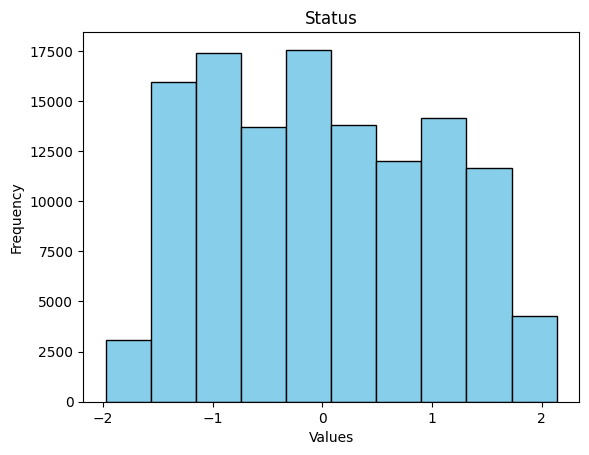

In [ ]:
#Se grafica

import matplotlib.pyplot as plt
import numpy as np

plt.hist(alldf.num__age, color='skyblue', edgecolor='black')


plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Status')


plt.show()

In [ ]:
#Se visuliza el conjunto de X de testeo

X_test

,Unnamed: 0,loan_id,id,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,name_income_type,name_education_type,...,flag_email,occupation_type,cnt_fam_members,birthday,job_start_date,loan_date,loan_amount,age,years_on_the_job,avg_amount_loans_previous
6096,6096,35808,5010872,M,Y,Y,1.0,450000.0,Commercial associate,Secondary / secondary special,...,1,Core staff,3.0,1971-12-16,2019-11-09,2020-05-12,146.808973,52,4.0,123.008799
40523,40523,230768,5046497,F,Y,NaN,1.0,135000.0,Commercial associate,Secondary / secondary special,...,0,Sales staff,3.0,1981-07-02,2019-07-24,2020-06-26,104.566129,43,5.0,132.201662
29617,29617,162597,5036655,F,N,Y,0.0,90000.0,State servant,Higher education,...,0,NaN,2.0,1966-10-19,2007-02-22,2020-06-11,131.121965,57,17.0,131.883347
60112,60112,341136,5065362,F,N,Y,1.0,216000.0,Working,Higher education,...,0,Core staff,2.0,1992-12-06,2016-10-31,2020-06-25,134.269849,31,7.0,121.266241
13170,13170,75098,5023206,F,N,N,1.0,135000.0,Commercial associate,Secondary / secondary special,...,0,Sales staff,3.0,1982-03-08,2021-01-25,2019-02-12,119.677885,42,3.0,102.767300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77982,77982,435567,5089650,F,N,N,0.0,99000.0,Commercial associate,Secondary / secondary special,...,0,Core staff,1.0,1976-11-14,2020-09-12,2020-02-17,102.222490,47,3.0,127.353135
57390,57390,324588,5062017,F,N,N,0.0,180000.0,Commercial associate,Secondary / secondary special,...,0,NaN,1.0,1990-08-29,2015-03-04,2020-05-02,149.691036,34,9.0,139.094393
128345,128345,700905,5139913,F,Y,N,1.0,166500.0,State servant,Higher education,...,0,Medicine staff,3.0,1982-01-16,2005-10-12,2020-09-27,102.804957,42,18.0,137.995044
78932,78932,440373,5089918,NaN,N,Y,0.0,144000.0,Pensioner,Secondary / secondary special,...,0,NaN,2.0,1961-09-16,NaN,2019-09-06,105.501312,62,NaN,NaN


In [ ]:
#Se aplica el pipeline2 al conjunto de datos de prueba X_test para generar predicciones, que luego se almacenan en la variable preds

preds = pipeline2.predict(X_test)
preds

array([0, 0, 0, ..., 0, 0, 0])

# Metricas del modelo

In [ ]:
#Se calcula el accurary

print('ACC:', metrics.accuracy_score(y_test, preds))

ACC: 0.9795094908950563


In [ ]:
#Se calcula el precision

print('PRE:', metrics.precision_score(y_test, preds))

PRE: 0.2967914438502674


In [ ]:
#Se calcula el recall

print('REC:', metrics.recall_score(y_test, preds))

REC: 0.2569444444444444


In [ ]:
#Se calcula el F1 score

print('F1:', metrics.f1_score(y_test, preds))

F1: 0.27543424317617865


In [ ]:
#Matriz de confusion

print('CM:', metrics.confusion_matrix(y_test, preds))

CM: [[27806   263]
 [  321   111]]


In [ ]:
#Se calcula la curva ROC  y el valor del AUC (Area Under the Curve) para el modelo

fpr, tpr, thresholds = metrics.roc_curve(y_test, preds, pos_label=2)
print('AUC:', metrics.auc(fpr, tpr))

AUC: nan


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1133: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


In [ ]:
#Tasa de falsos positivos

fpr

array([0.        , 0.01312235, 1.        ])

In [ ]:
#Tasa de verdaderos positivos

tpr

array([nan, nan, nan])

In [ ]:
#Classification report

print(metrics.classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     28069
           1       0.30      0.26      0.28       432

    accuracy                           0.98     28501
   macro avg       0.64      0.62      0.63     28501
weighted avg       0.98      0.98      0.98     28501



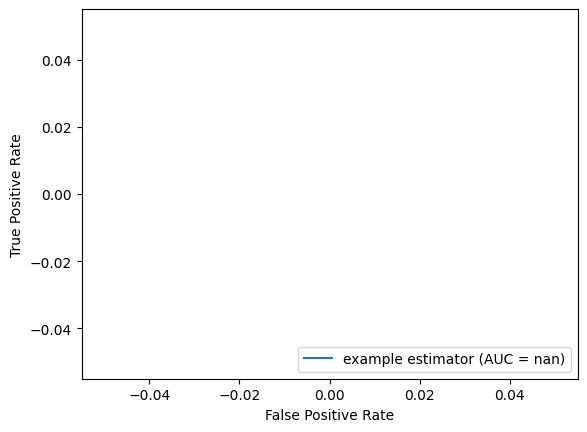

In [ ]:
#Se importan librerias para graficar

import matplotlib.pyplot as plt

#Grafico curva ROC

# Calculate the AUC score first
roc_auc = metrics.auc(fpr, tpr)  # Assuming 'fpr' and 'tpr' are already calculated

display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='example estimator')
display.plot()
plt.show()

# Guardado del modelo

In [ ]:
#Se llama al modelo

model

RandomForestClassifier()

In [ ]:
#Se muestran los datos de la primera fila del DataFrame X_test, permitiendo revisar las características en el conjunto de prueba

X_test.iloc[0]

,6096
Unnamed: 0,6096
loan_id,35808
id,5010872
code_gender,M
flag_own_car,Y
flag_own_realty,Y
cnt_children,1.0
amt_income_total,450000.0
name_income_type,Commercial associate
name_education_type,Secondary / secondary special


In [ ]:
#Se toma la primera fila del conjunto de datos X_test, se convierte en el formato adecuado para hacer predicciones, y luego usa el pipeline2 para hacer una predicción para esa instancia específica
#Luego se selecciona la primera predicción del resultado para inspeccion

pipeline2.predict(X_test.iloc[0].to_frame().T)[0]

0

In [ ]:
#Se importa libreria para almacenar el pipeline

import joblib

In [ ]:
joblib.dump(pipeline2, '/content/drive/My Drive/pipeline')

['/content/drive/My Drive/pipeline']

In [ ]:
#Se guarda el modelo

model_saved = joblib.load('/content/drive/My Drive/pipeline')

In [ ]:
#Se ransforma la primera fila de X_test en un DataFrame con una sola fila y múltiples columnas
#Esto permite que una instancia específica se procese de manera uniforme con el resto de los datos

X_test.iloc[0].to_frame().T

,Unnamed: 0,loan_id,id,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,name_income_type,name_education_type,...,flag_email,occupation_type,cnt_fam_members,birthday,job_start_date,loan_date,loan_amount,age,years_on_the_job,avg_amount_loans_previous
6096,6096,35808,5010872,M,Y,Y,1.0,450000.0,Commercial associate,Secondary / secondary special,...,1,Core staff,3.0,1971-12-16,2019-11-09,2020-05-12,146.808973,52,4.0,123.008799


In [ ]:
#Se toma la primera fila del DataFrame X_test y se convierte a un formato adecuado para la prediccion
#Se usa el modelo guardado model_saved para hacer una predicción sobre esa instancia, y luego obtiene el valor de la primera (y única) predicción.
# Esto es útil para verificar cómo se comporta el modelo con una instancia específica.

model_saved.predict(X_test.iloc[0].to_frame().T)[0]

0

In [ ]:
#Se verifica la version de la biblioteca sklearn

sklearn.__version__

'1.3.2'